# Tutorial 4


## In any of packages are missing, use syntax below 
#### to install scipy
##### !pip install scipy

In [1]:
# not all packages are used in this example. They are imported here for convinience to be used in future examples
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mplt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as ppx
import scipy as scp
from scipy.stats import norm

import warnings
import sys

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [2]:

print("seaborn",sns.__version__)
print("pandas",pd.__version__)
print("matplotlib",mplt.__version__)
print("seaborn",sns.__version__)
print("matplotlib",mplt.__version__)
print("plotly",ppx.__version__)
print("numpy",np.__version__)
print("scipy",scp.__version__)

print("\n")
print("python",sys.version)
print("\n")

seaborn 0.13.2
pandas 2.2.2
matplotlib 3.9.1.post1
seaborn 0.13.2
matplotlib 3.9.1.post1
plotly 5.23.0
numpy 2.0.1
scipy 1.14.0


python 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]




### Finite Difference Scheme for the ODE



<!--
<font size="6">  <div class="latex">  -->
$$U^"(t) + (1+t^2)U'(t) + U(t) = 0$$

$$U(0) = 0 \ \ \ and\ \ \   U'(0) = 2$$
<!--</div>    
</font>__>>v>
</(x) \,dx  
$$  

### Forward Scheme


#### initial values

In [9]:
T=1
N=10
dt=2**(-N)

M = int(np.floor(T/dt))
print("Number of Steps - ",M)

#initial conditions 
u0 = 1
u0p = 2

u = []
u = [0 for i in range(M)]
u[0] = u0
u[1] = u0 + u0p*dt


Number of Steps -  1024


In [10]:
for i in range(2 , M):
    u[i]=(2+(1+(i-2)**2*dt**2)*dt-dt**2)/(1+(1+(i-2)**2*dt**2)*dt)*u[i-1]-1/(1+(1+(i-2)**2*dt**2)*dt)*u[i-2]


#end
#u(M+1)
#plot(0:dt:1,u);

### Plot

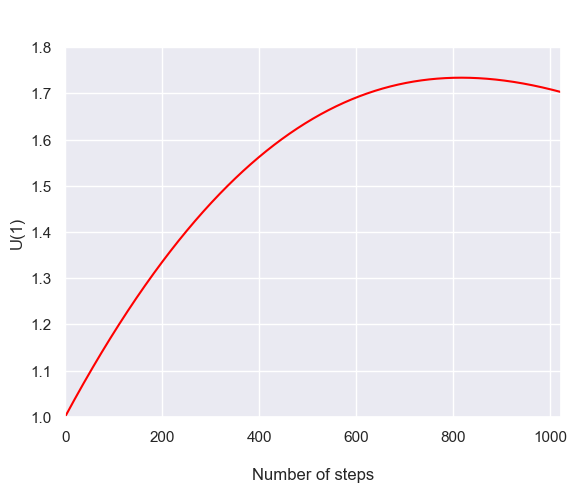

In [11]:
plt.plot(range(M), u, color='red')

plt.xlabel('\nNumber of steps')
plt.ylabel('U(1)')
plt.title('\n')
#you need to change x-axis limit depending on your result
plt.xlim((0,M-1))
#you need to change y-axis limit depending on your result
plt.ylim((1,1.8))

plt.show()


 ### Backward Scheme

#### initialise  values

In [12]:

u[0] = u0;
u[1] = u0 + u0p * dt



In [13]:
#main loop 
for i in range(2 , M):
    u[i]=(2-(1+(i-2)**2*dt**2)*dt-dt**2)*u[i-1]+((1+(i-2)**2*dt**2)*dt-1)*u[i-2]
#   u[i]=(2+(1+(i-2)**2*dt**2)*dt-dt**2)/(1+(1+(i-2)**2*dt**2)*dt)*u[i-1]-1/(1+(1+(i-2)**2*dt**2)*dt)*u[i-2]

print(u[M-1])

1.7018673159660553


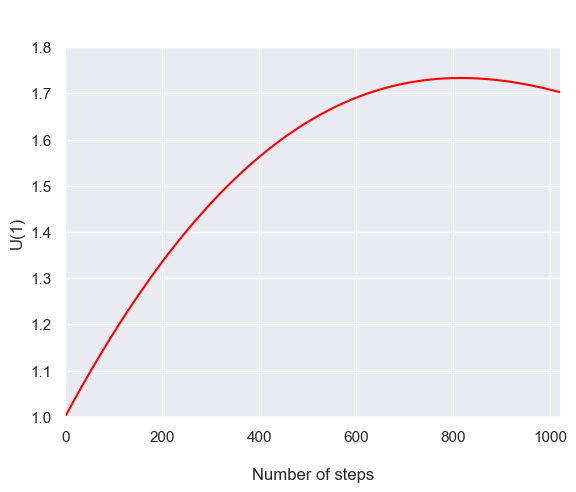

In [14]:
plt.plot(range(M), u, color='red')

plt.xlabel('\nNumber of steps')
plt.ylabel('U(1)')
plt.title('\n')
#you need to change x-axis limit depending on your result
plt.xlim((0,M-1))
#you need to change y-axis limit depending on your result
plt.ylim((1,1.8))

plt.show()


### Central Difference

In [15]:
u0   = 1
u0p  = 2
u0pp =-3

u = [0 for i in range(M)]

u[0] = u0
u[1] = u0 + u0p*dt + u0pp*(dt**2)  / 2

for i in range(2 , M):
    u[i]=(2-dt**2)/(1+(1+(i-2)**2*dt**2)*dt/2)*u[i-1]-(1-(1+(i-2)**2*dt**2)*dt/2)/(1+(1+(i-2)**2*dt**2)*dt/2)*u[i-2]

print(u[M-1])




1.7015758853479819


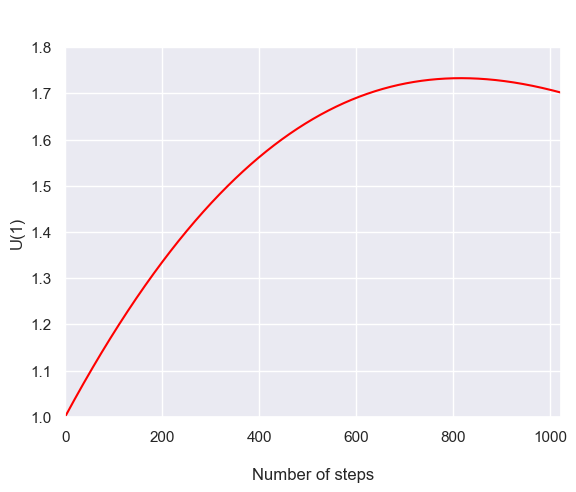

In [16]:
plt.plot(range(M), u, color='red')
plt.xlabel('\nNumber of steps')
plt.ylabel('U(1)')
plt.title('\n')
#you need to change x-axis limit depending on your result
plt.xlim((0,M-1))
#you need to change y-axis limit depending on your result
plt.ylim((1,1.8))

plt.show()


## Black Scholes PDE using Heat Equation Transformation 

In [11]:
sigma=0.2
r=0.07
K=100

T=1
q=2*r/sigma**2

M = 1000
N = 100

dt=sigma**2 * T/2/M
dx=6*sigma*np.sqrt(T)/N
lambda1 = dt/dx**2

KK = []
KK = [100 for i in range(N)]

x = []
x = [0 for i in range(N)] 

for n in range(N):
    x[n] = -3*sigma*np.sqrt(T)+(n-1)*dx


u = []
u = [0 for i in range(N)] 


for n in range(N):
    u[n]=np.maximum(np.exp((q+1)/2*x[n]) - np.exp((q-1)/2*x[n]),0)


for m in range (1,M):
    w = [0 for i in range(N)]  #for u(t+dt)
    w[1]=0
    w[N-1] = np.exp((q+1)*x[N-1]/2+(q+1)**2*(m-1)*dt/4)-np.exp((q-1)*x[N-1]/2+(q-1)**2*(m-1)*dt/4)
    for n in range(1,N-1):
        w[n]=lambda1 * u[n-1]+(1-2 * lambda1)*u[n] + lambda1 * u[n+1]
    #get u(t+dt)
    u=w


S = []
S = [0 for i in range(N)] 
V = []
V = [0 for i in range(N)] 

for n in range(N):
    S[n]=K * np.exp(x[n]);
    V[n]=u[n]*K * np.exp(-(q-1)/2*x[n]-(q+1)**2 / 4*sigma**2*T/2);




n0=(np.log(60/100)+3*sigma*np.sqrt(T))/dx+1

A = np.floor(n0)
nl=int(A)

price60=V[nl]*(nl+1-n0)+V[nl+1]*(n0-nl)

n0=(np.log(100/100)+3*sigma*np.sqrt(T))/dx+1

A=np.floor(n0)
nl=int(A)

price100=V[nl]*(nl+1-n0)+V[nl+1]*(n0-nl)

n0=(np.log(150/100)+3*sigma*np.sqrt(T))/dx+1

A = np.floor(n0)
print(n0)
nl=int(A)

price150=V[nl]*(nl+1-n0)+V[nl+1]*(n0-nl)

print(price60, price100, price150)



84.78875900901369
0.06999124165168202 11.530462965085366 56.811473241971804


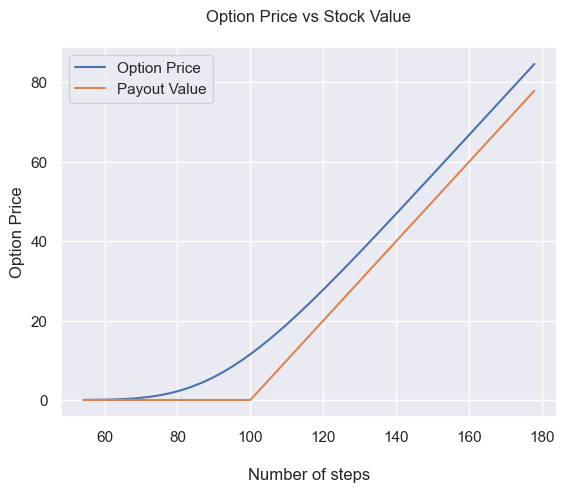

In [12]:

VV = np.subtract(S,KK)
VV= np.maximum(VV,0)

plt.plot(S, V, label = "Option Price")
plt.plot(S, VV, label = "Payout Value")

plt.xlabel('\nNumber of steps')
plt.ylabel('Option Price')
plt.title('Option Price vs Stock Value\n')
plt.legend()

plt.show()
